In [1]:
# practice for corpus workshop
# Jeremy Fahringer
#
#  based on Summer School of Linguistics 2016 - python for linguists workshops
#  https://github.com/dlukes/ssol/blob/master/notebooks/day4.ipynb

In [6]:
import nltk
# this imports the `regex` library and renames it to `re` for convenience
# (it's less typing)
import regex as re

%matplotlib notebook


In [7]:
import IPython.core.display as ipd
import ipywidgets as ipw

@ipw.interact(regex=ipw.Text(), string=ipw.Textarea())
def findall(DOTALL=False, MULTILINE=False, IGNORECASE=False, only_first=False, regex="", string=""):
    if not (regex and string):
        ipd.display(ipd.HTML(""))
        return None
    flags = 0
    if DOTALL:
        flags |= re.DOTALL
    if MULTILINE:
        flags |= re.MULTILINE
    if IGNORECASE:
        flags |= re.IGNORECASE
    start = '<span style="background-color: gold">'
    end = "</span>"
    offset_bump = len(start) + len(end)
    offset = 0
    html = string
    matches = []
    for m in re.finditer(regex, string, flags):
        matches.append(m.captures()[0])
        span = m.span()
        sstart, send = span[0] + offset, span[1] + offset
        html = html[:sstart] + start + html[sstart:send] + end + html[send:]
        offset += offset_bump
        if only_first:
            break
    ipd.display(ipd.HTML("<p>regex: <strong>" + regex + "</strong></p>" + "<pre>" + html + "</pre"))
    return matches

interactive(children=(Checkbox(value=False, description='DOTALL'), Checkbox(value=False, description='MULTILINE'), Checkbox(value=False, description='IGNORECASE'), Checkbox(value=False, description='only_first'), Text(value='', description='regex'), Textarea(value='', description='string'), Output()), _dom_classes=('widget-interact',))

# getting data into Python

In [14]:
tweets = nltk.corpus.PlaintextCorpusReader("./corpusdata/tweets_sample/", ["tweets_2017-06-01-00_en_textonly.txt"])

In [15]:
tweets.fileids()

['tweets_2017-06-01-00_en_textonly.txt']

In [16]:
tweets.words('tweets_2017-06-01-00_en_textonly.txt')

['text', 'I', "'", 'm', 'so', 'lost', 'RT', '@', ...]

In [12]:
tweets

<PlaintextCorpusReader in '/Users/dharris2/Documents/JupyterNotebooks/corpusdata/tweets_sample'>

In [17]:
tweets.raw()

'text\r\nI\'m so lost\r\nRT @allkpop: Jun.K is a hot professor in final \'6 Nights\' concert individual teaser␤https://t.co/DHFpBVpko8 https://t.co/PCKHeoa0jF\r\nNow those are some cheeks ( ㅅ ) https://t.co/gTdYeexSlp\r\nI\'m ready to go to sleep.\r\nLol damn I\'m just a loser son \U0001f926\U0001f3fd\u200d♂️\r\nRT @mandytoohot: Learn to love a girl for who she is and how she treats you. Not by how she looks or what she gives you.\r\nIt is 06:39 UTC now\r\n@Stormy_Tuesday_ @TaePhoenix @jonfavs @elonmusk Supported by taxpayer subsidies to the tune of $Bs...gonna be funny… https://t.co/lKbZ8CNBXj\r\n45% OFF-Car Leather Mobile Phone Holder Debris Bag, $3 Now NewFrog https://t.co/33Hc4H4752\r\n@dcrkandtwistv @CoBaxterBayley Yeah but then he\'d get nervous and it\'ll all be downhill from then.\r\nIt is 08:39 CEST now\r\nRT @crhemanth: The great thing about movies is that someone will always find a way to surprise you, just when you become rigid. Bring it on…\r\nI feel like if you talk about

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/dharris2/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
tweets_tokens = nltk.word_tokenize(tweets.raw()) ## fails on tweet data?

In [22]:
tweets_tokens[:30]

['text',
 'I',
 "'m",
 'so',
 'lost',
 'RT',
 '@',
 'allkpop',
 ':',
 'Jun.K',
 'is',
 'a',
 'hot',
 'professor',
 'in',
 'final',
 "'6",
 'Nights',
 "'",
 'concert',
 'individual',
 'teaser␤https',
 ':',
 '//t.co/DHFpBVpko8',
 'https',
 ':',
 '//t.co/PCKHeoa0jF',
 'Now',
 'those',
 'are']

In [23]:
tweets_text = nltk.Text(tweets_tokens)

<IPython.core.display.Javascript object>


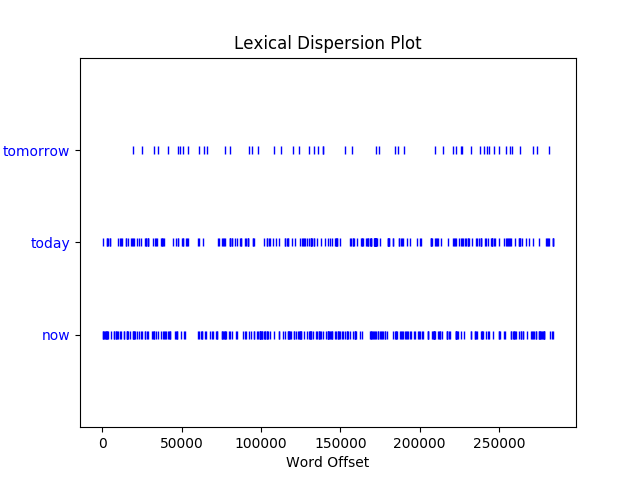

In [25]:
tweets_text.dispersion_plot(["tomorrow","today","now"])
